# PCA Model for Cost of Living Information

Load necessary libraries:

In [19]:
library(dplyr)

First, read the data from 'costofliving.csv'. This is the scraped data obtained from 'scrape_data.ipynb'.

In [2]:
costofliving <- read.csv("costofliving.csv")
data <- costofliving[,-1]
rownames(data) <- costofliving[,1]
data <- data[,-c(1,54,55)]

Next, fit a PCA model to the data and output the summary and scree plot.

In [3]:
pcamod <- prcomp(data, scale.=TRUE)
summary(pcamod)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.8135 2.6839 2.03390 1.74686 1.67218 1.51459 1.42505
Proportion of Variance 0.1522 0.1385 0.07955 0.05868 0.05377 0.04412 0.03905
Cumulative Proportion  0.1522 0.2908 0.37030 0.42898 0.48276 0.52687 0.56592
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.38287 1.30222 1.26026 1.21909 1.17100 1.14044 1.02062
Proportion of Variance 0.03678 0.03261 0.03054 0.02858 0.02637 0.02501 0.02003
Cumulative Proportion  0.60270 0.63531 0.66585 0.69444 0.72081 0.74582 0.76585
                          PC15    PC16    PC17    PC18   PC19   PC20    PC21
Standard deviation     1.01548 0.98677 0.93308 0.91377 0.8802 0.8409 0.78156
Proportion of Variance 0.01983 0.01873 0.01674 0.01606 0.0149 0.0136 0.01175
Cumulative Proportion  0.78568 0.80440 0.82115 0.83720 0.8521 0.8657 0.87745
                          PC22    PC23    

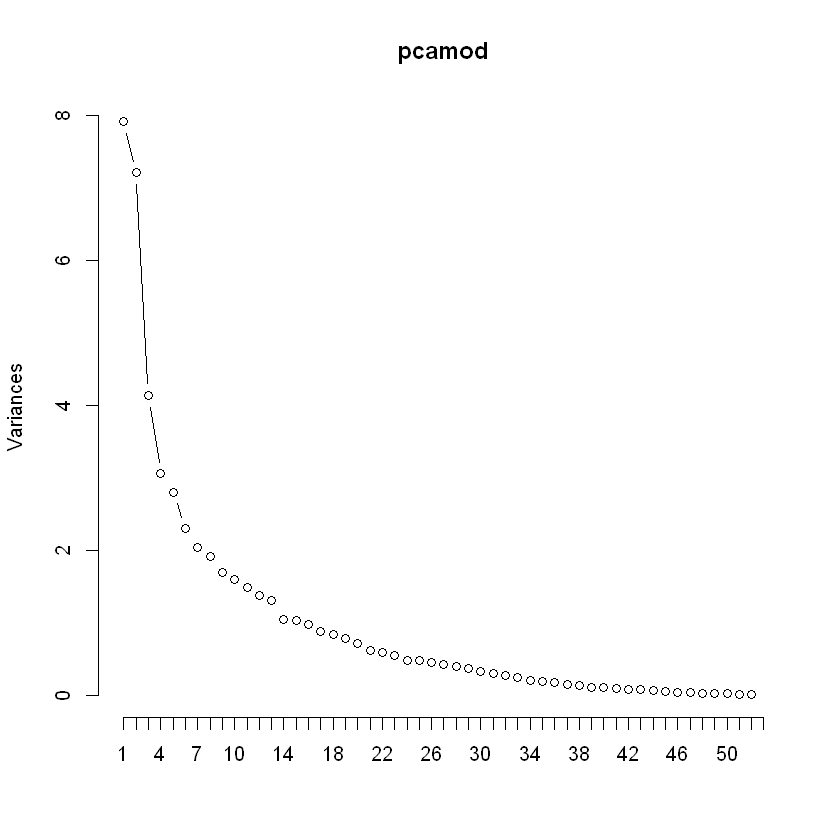

In [4]:
plot(pcamod, type="lines", npcs=53)

Based on the summary output, if we want to retain 90% of the variance, 24 components should be retained. Whereas, based on the kaiser criterion, 15 components should be retained. Lastly, based on the scree plot, 4 components should be retained as the jump from 4 to 5 components is not too big.

For simplicity, I will retain 4 components based on the scree plot and interpret them. Below is a summary of the first four components' loadings. 

In [5]:
round(pcamod$rotation[,1:4], 2)

,PC1,PC2,PC3,PC4
Meal..Inexpensive.Restaurant.,-0.10,0.00,-0.21,-0.21
Meal.for.2.People..Mid.range.Restaurant..Three.course.,-0.17,0.12,0.00,-0.05
McMeal.at.McDonalds..or.Equivalent.Combo.Meal.,0.02,0.10,-0.13,-0.03
Domestic.Beer..0.5.liter.draught.,-0.11,0.08,-0.15,-0.16
Imported.Beer..0.33.liter.bottle.,0.07,-0.15,-0.05,0.17
Cappuccino..regular.,-0.04,-0.08,-0.20,-0.26
Coke.Pepsi..0.33.liter.bottle.,0.02,-0.12,-0.08,-0.11
Water..0.33.liter.bottle.,-0.04,-0.09,-0.18,-0.22
Milk..regular....1.liter..,-0.12,-0.08,-0.05,0.10
Loaf.of.Fresh.White.Bread..500g.,-0.03,-0.19,-0.03,-0.02


### Principal Component 1

Below are the loadings for PC1 sorted by its absolute values. Variables which have the highest loading in terms of its magnitude will be at the top of the list while variables which have the lowest loading in terms of its magnitude will be at the bottom of the list. 

In [6]:
pc1_loadings_rounded <- data.frame(round(pcamod$rotation[,1],2))
colnames(pc1_loadings_rounded) <- "loading"
head(pc1_loadings_rounded |> arrange(desc(abs(loading))))

,loading
,<dbl>
Apartment..1.bedroom..Outside.of.Centre,-0.32
Apartment..1.bedroom..in.City.Centre,-0.31
Apartment..3.bedrooms..in.City.Centre,-0.31
Apartment..3.bedrooms..Outside.of.Centre,-0.31
Price.per.Square.Meter.to.Buy.Apartment.in.City.Centre,-0.29
Price.per.Square.Meter.to.Buy.Apartment.Outside.of.Centre,-0.29


Here, almost all of the loadings are negative and variables that are at the top of the list are mostly related to the price to rent or buy an apartment. Thus, we can roughly interpret PC1 as scores for accommodation. Cities which have more expensive apartment price will get a lower score as it will be multiplied by a relatively big negative loading.

The top 5 cities which has the highest scores for PC1 are:    
(mainly correspond to less expensive accommodation price)

In [7]:
pc1_scores <- data.frame(pcamod$x[,1][order(pcamod$x[,1], decreasing=TRUE)])
colnames(pc1_scores) <- "score"
head(round(pc1_scores,2), 5)

,score
,<dbl>
Sherbrooke,6.09
Richmond,5.43
Laval,3.83
Gander-Canada,3.82
Medicine-Hat,3.53


The top 5 cities which has the lowest scores for PC1 are:   
(mainly correspond to more expensive accommodation price)

In [8]:
pc1_scores <- data.frame(pcamod$x[,1][order(pcamod$x[,1], decreasing=FALSE)])
colnames(pc1_scores) <- "score"
head(round(pc1_scores,2), 5)

,score
,<dbl>
Whistler,-9.74
Vancouver,-6.18
Toronto,-5.25
Sechelt-Canada,-5.23
Oakville,-4.73


### Principal Component 2

Below are the loadings for PC2 sorted by its absolute values. Similar to the previous section, variables which have the highest loading in terms of its magnitude will be at the top of the list.

In [9]:
pc2_loadings_rounded <- data.frame(round(pcamod$rotation[,2],2))
colnames(pc2_loadings_rounded) <- "loading"
head(pc2_loadings_rounded |> arrange(desc(abs(loading))))

,loading
,<dbl>
Apples..1kg.,-0.25
Oranges..1kg.,-0.25
Onion..1kg.,-0.24
Lettuce..1.head.,-0.24
Monthly.Pass..Regular.Price.,0.23
Rice..white....1kg..,-0.22


For PC2, most of the loadings at the top of the list are negative and related to the price of grocery items such as Apples, Oranges, Onion, Lettuce, and White Rice. Thus, we can roughly interpret PC2 as scores for groceries. Cities which grocery prices are more expensive will get a lower score. Whereas cities which grocery prices are less expensive will get a higher score.

The top 5 cities which has the highest score for PC2 are:   
(mainly correspond to less expensive grocery price)

In [10]:
pc2_scores <- data.frame(pcamod$x[,2][order(pcamod$x[,2], decreasing=TRUE)])
colnames(pc2_scores) <- "score"
head(round(pc2_scores,2), 5)

,score
,<dbl>
Pickering,7.00
Richmond,3.91
Richmond-Hill-Canada,3.71
Markham,3.69
Mississauga,3.68


The top 5 cities which has the lowest score for PC2 are:   
(mainly correspond to more expensive grocery price)

In [11]:
pc2_scores <- data.frame(pcamod$x[,2][order(pcamod$x[,2], decreasing=FALSE)])
colnames(pc2_scores) <- "score"
head(pc2_scores, 5)

,score
,<dbl>
Charlottetown,-8.439136
Fort-Saskatchewan-Canada,-7.434267
Sechelt-Canada,-7.210163
Burlington,-4.639174
Salmon Arm,-3.995560


### Principal Component 3

Below are the loadings for PC3 sorted by its absolute values. Similar to the previous section, variables which have the highest loading in terms of its magnitude will be at the top of the list.

In [12]:
pc3_loadings_rounded <- data.frame(round(pcamod$rotation[,3],2))
colnames(pc3_loadings_rounded) <- "loading"
head(pc3_loadings_rounded |> arrange(desc(abs(loading))),10)

,loading
,<dbl>
X1.Pair.of.Jeans..Levis.501.Or.Similar.,-0.34
X1.Pair.of.Men.Leather.Business.Shoes,-0.27
Taxi.1hour.Waiting..Normal.Tariff.,-0.26
Gasoline..1.liter.,-0.22
Meal..Inexpensive.Restaurant.,-0.21
Taxi.Start..Normal.Tariff.,0.21
International.Primary.School..Yearly.for.1.Child.,0.21
X1.Pair.of.Nike.Running.Shoes..Mid.Range.,-0.21
Cappuccino..regular.,-0.20


It can be seen that for PC3, variables which are at the top of the list varies in categories. Personally, I would categorize these top variables into lifestyle category which include fashion, travel, and food. Since, most of the top variables are negative, cities with higher cost for lifestyle will get a lower score. 

The top 5 cities which has the highest score for PC3 are:   
(mainly correspond to less expensive lifestyle cost)

In [13]:
pc3_scores <- data.frame(pcamod$x[,3][order(pcamod$x[,3], decreasing=TRUE)])
colnames(pc3_scores) <- "score"
head(round(pc3_scores,2), 5)

,score
,<dbl>
Burlington,6.04
Brampton,4.21
Newmarket,3.92
Charlottetown,3.87
Richmond-Hill-Canada,3.41


The top 5 cities which has the lowest score for PC3 are:   
(mainly correspond to more expensive lifestyle cost)

In [14]:
pc3_scores <- data.frame(pcamod$x[,3][order(pcamod$x[,3], decreasing=FALSE)])
colnames(pc3_scores) <- "score"
head(round(pc3_scores,2), 5)

,score
,<dbl>
Mascouche-Canada,-7.26
Brossard-Canada,-4.16
Sechelt-Canada,-3.92
Port-Alberni-Canada,-3.36
Quebec City,-2.45


### Principal Component 4

Below are the loadings for PC4 sorted by its absolute values. Similar to the previous section, variables which have the highest loading in terms of its magnitude will be at the top of the list.

In [15]:
pc4_loadings_rounded <- data.frame(round(pcamod$rotation[,4],2))
colnames(pc4_loadings_rounded) <- "loading"
head(pc4_loadings_rounded |> arrange(desc(abs(loading))),10)

,loading
,<dbl>
Toyota.Corolla.Sedan.1.6l.97kW.Comfort..Or.Equivalent.New.Car.,0.29
Cappuccino..regular.,-0.26
Domestic.Beer..0.5.liter.bottle.,0.25
X1.min..of.Prepaid.Mobile.Tariff.Local..No.Discounts.or.Plans.,0.25
Beef.Round..1kg...or.Equivalent.Back.Leg.Red.Meat.,0.24
Taxi.1km..Normal.Tariff.,-0.24
Tennis.Court.Rent..1.Hour.on.Weekend.,0.24
Water..0.33.liter.bottle.,-0.22
One.way.Ticket..Local.Transport.,0.22


The interpretation for PC4 would be a little tricky as the top variables with the highest magnitude in loadings vary from price of cars, coffee, beer, prepaid mobile, beef, and etc. It is also notable that the highest magnitude loadings are positive. Hence, in general, cities which have a high price in cars, beer, prepaid mobile, and beef will have a higher score. 

To align the scores with the previous results, we can multiply the whole PC4 loadings/scores by -1 as it doesn't undermine the underlying mathematics.

The top 5 cities which has the highest score for PC4 are:    
(after multiplying by -1)

In [16]:
pc4_scores <- data.frame(-pcamod$x[,4][order(-pcamod$x[,4], decreasing=TRUE)])
colnames(pc4_scores) <- "score"
head(round(pc4_scores,2), 5)

,score
,<dbl>
Banff,6.08
Burlington,4.82
Richmond,3.25
Whistler,3.11
Courtenay-Canada,2.93


The top 5 cities which has the lowest score for PC4 are:   
(after multiplying by -1)

In [17]:
pc4_scores <- data.frame(-pcamod$x[,4][order(-pcamod$x[,4], decreasing=FALSE)])
colnames(pc4_scores) <- "score"
head(round(pc4_scores,2), 5)

,score
,<dbl>
Sechelt-Canada,-5.92
Mississauga,-2.57
Newmarket,-2.56
Oshawa,-2.17
Richmond-Hill-Canada,-2.15


### Cities Ranking

The average scores across 4 components will be used to determine the cost of living ranking for each city. Since the loading of the highest magnitude variables are mostly negative, more expensive cities will get a lower score. Conversely, more affordable cities will get a higher score. Below are the top 10 most affordable Canadian cities to live in.

In [18]:
scores <- data.frame(pcamod$x[,c(1,2,3)], -pcamod$x[,4])
colnames(scores) <- c("PC1","PC2","PC3","PC4")
scores['average'] <- NA

for (i in 1:70){
    scores[i,5] <- mean(unlist(scores[i,1:4]))
}

head(scores[rownames(scores)[order(scores$average, decreasing=TRUE)],],10)

,PC1,PC2,PC3,PC4,average
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Richmond,5.4331687,3.9148548,1.3564787,3.2510595,3.4888904
Burlington,2.4232554,-4.6391739,6.0435990,4.8222158,2.1624741
Pickering,0.7369220,6.9963444,-0.1626951,-1.1171192,1.6133630
Gander-Canada,3.8209054,-1.1973388,3.3217771,-0.1924950,1.4382122
Laval,3.8256681,3.0691506,-1.0739295,-0.3917668,1.3572806
Gatineau,3.1105099,1.4640957,0.3107344,0.3438253,1.3072913
Brampton,0.2856988,2.2386104,4.2137011,-2.0652600,1.1681876
Medicine-Hat,3.5272592,0.2423750,2.1084307,-1.2323020,1.1614407
Belleville,1.6437511,0.3141816,1.1184581,1.1468324,1.0558058


It turns out that Richmond came in first place. Hence, Richmond is one of the most affordable Canadian city to live in based on an average score of 4 principal components.

Since we have looked at the cost of living ranking, we should also look at the salary ranking for the cities. Below are top 25 cities with the highest average salary.

In [30]:
salrank <- costofliving[,c(1,55)]
colnames(salrank) <- c("City", "Salary")
head(salrank[order(salrank$Salary, decreasing=TRUE),],25)

,City,Salary
,<chr>,<dbl>
1,North Vancouver,6243.75
2,Whitby,6183.33
3,Burlington,5083.33
4,Pickering,5066.67
5,Brossard-Canada,4958.33
6,Toronto,4916.43
7,Markham,4815.07
8,Fort-Saskatchewan-Canada,4727.78
9,Burnaby,4596.94


### Conclusion

Based on the salary ranking, Richmond came in 23rd, which is not that bad and still above average, considering there are 70 cities in this dataset.

However, notice that there are four cities located around Richmond that have higher average salaries than Richmond. Those cities are North Vancouver (1st), Burnaby (9th), Surrey (11th), and Vancouver (14th).

Therefore, the best strategy in choosing the best city to live in would be to live in Richmond where it is most affordable but get a job in those four surrounding cities where the average salary is higher.

Of course, apart from the financial aspect, there are lots of other things to consider in choosing where to live. But, hopefully this project can serve as a guide or starting point in deciding the best Canadian city to live in.